# Plot Generation

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import ast

In [230]:
#Read in gp results
gp_mean = pd.read_csv("gp_final_data/final_data_mean.csv", index_col=0)
gp_ucb = pd.read_csv("gp_final_data/final_data_ucb.csv", index_col=0)
gp_var = pd.read_csv("gp_final_data/final_data_var.csv", index_col=0)
rand = pd.read_csv("gp_final_data/final_data_random.csv", index_col=0)
gp_ucb_biased = pd.read_csv("gp_final_data/final_data_ucb_biased.csv", index_col=0)

#read in initial data
data = pd.read_csv("TYK2_fingerprints.csv", index_col=0)

#read in indices for UMAP plots
umap_inds_ucb = pd.read_csv("gp_final_data/1_final_inds_ucb.csv", index_col=0)
umap_inds_var = pd.read_csv("gp_final_data/1_final_inds_var.csv", index_col=0)
umap_inds_mean = pd.read_csv("gp_final_data/1_final_inds_mean.csv", index_col=0)
umap_inds_rand = pd.read_csv("gp_final_data/1_final_inds_random.csv", index_col=0)
umap_inds_ucb_biased = pd.read_csv("gp_final_data/1_final_inds_ucb_biased.csv", index_col=0)

#convert indices to lists for plotting
umap_inds_ucb = umap_inds_ucb["0"].tolist()
umap_inds_var = umap_inds_var["0"].tolist()
umap_inds_mean = umap_inds_mean["0"].tolist()
umap_inds_rand = umap_inds_rand["0"].tolist()
umap_inds_ucb_biased = umap_inds_ucb_biased["0"].tolist()

In [231]:
data

,smiles,target,active,fingerprint
0,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)N)Cl,5.608397,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,7.972925,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC(...,6.731267,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,7.653882,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C=Cc1cc(c(c(c1)Cl)C(=O)Nc2cc(ncc2F)NC(=O)C3CC3...,6.562022,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
9992,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CF)Cl,7.232871,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9993,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)CO)Cl,7.230769,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9994,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)Cl)Cl,7.756025,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9995,c1cncnc1Nc2cc(c(cn2)F)NC(=O)c3c(cc(cc3Cl)N)Cl,9.215634,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Distribution of Binding Affinities

Text(0, 0.5, 'Ligand Counts')

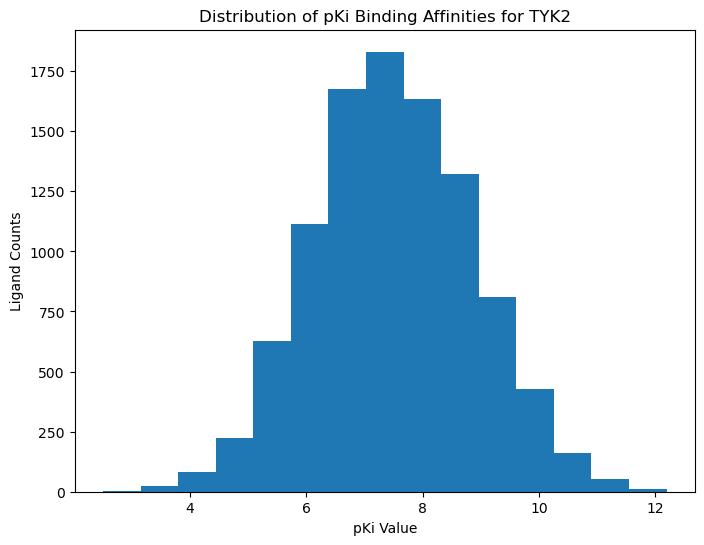

In [232]:
plt.figure(figsize=(8,6))
plt.hist(data['target'], 15)
plt.title("Distribution of pKi Binding Affinities for TYK2")
plt.xlabel("pKi Value")
plt.ylabel("Ligand Counts")

# Running UMAP

In [233]:
#Running UMAP on the fingerprints
lists = [ast.literal_eval(string) for string in data['fingerprint'].values]
embedding = umap.UMAP(random_state = 42).fit_transform(lists)
data["umap_1"] = embedding[:,0]
data["umap_2"] = embedding[:,1]

/Users/amanvirmani/miniforge3/envs/comp_med/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# UMAP Distribution

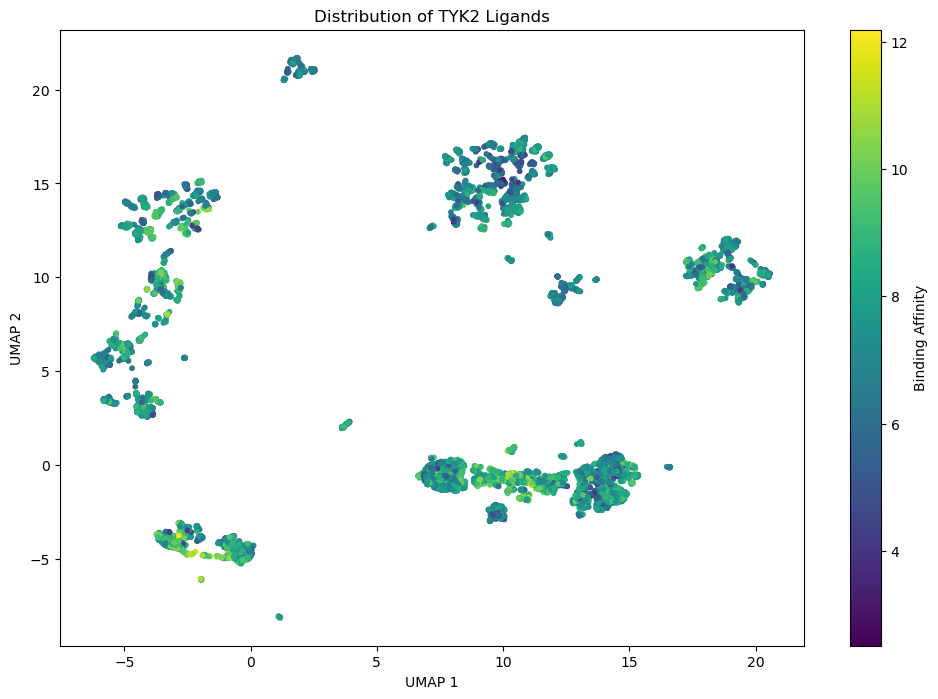

In [234]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], c=data['target'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Binding Affinity')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Distribution of TYK2 Ligands")
plt.show()

# Active Molecules (Top 5% of Binding Affinities)

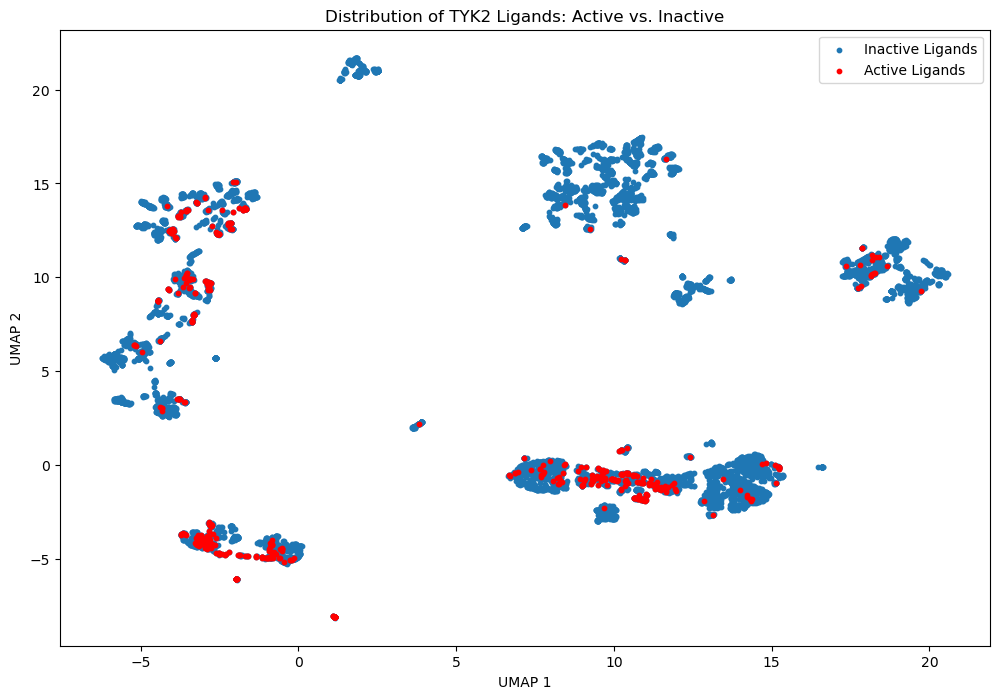

In [235]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Inactive Ligands")
plt.scatter(data[data["active"] == 1]["umap_1"], data[data["active"] == 1]["umap_2"], color='red', s=10, label="Active Ligands")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.title("Distribution of TYK2 Ligands: Active vs. Inactive")
plt.show()

In [236]:
print("Proportion of ligands that are labeled active:", len(data[data["active"] == 1]) / len(data))

Proportion of ligands that are labeled active: 0.05001500450135041


# Points selected from each query selection method

## UCB

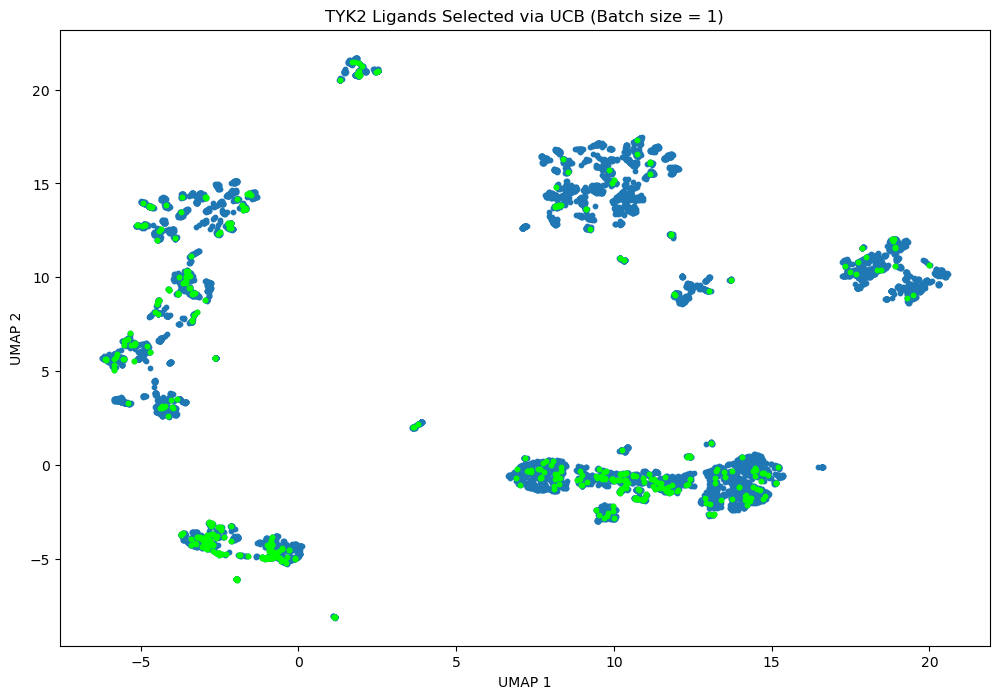

In [238]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10)
plt.scatter(data.iloc[umap_inds_ucb]["umap_1"], data.iloc[umap_inds_ucb]["umap_2"], color='lime', s=10)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via UCB (Batch size = 1)")
plt.show()

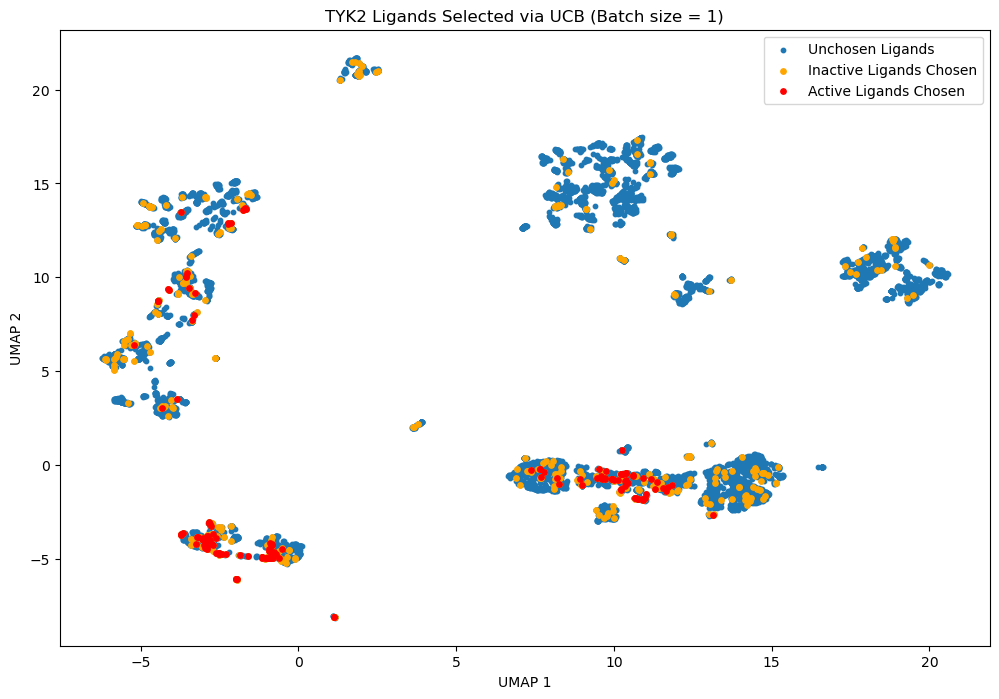

In [239]:
top_5_percent_values = data[data["active"] == 1]
top_5_percent_values_inds = top_5_percent_values.index.tolist()

intersection = list(set(top_5_percent_values_inds).intersection(set(umap_inds_ucb)))

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Unchosen Ligands")
plt.scatter(data.iloc[umap_inds_ucb]["umap_1"], data.iloc[umap_inds_ucb]["umap_2"], color='orange', s=15, label="Inactive Ligands Chosen")
plt.scatter(data.iloc[intersection]["umap_1"], data.iloc[intersection]["umap_2"], color='red', s=15, label="Active Ligands Chosen")
plt.legend()
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via UCB (Batch size = 1)")
plt.show()

In [240]:
print("Proportion of ligands that are labeled active:", len(intersection) / len(umap_inds_ucb))

Proportion of ligands that are labeled active: 0.298


## Variance

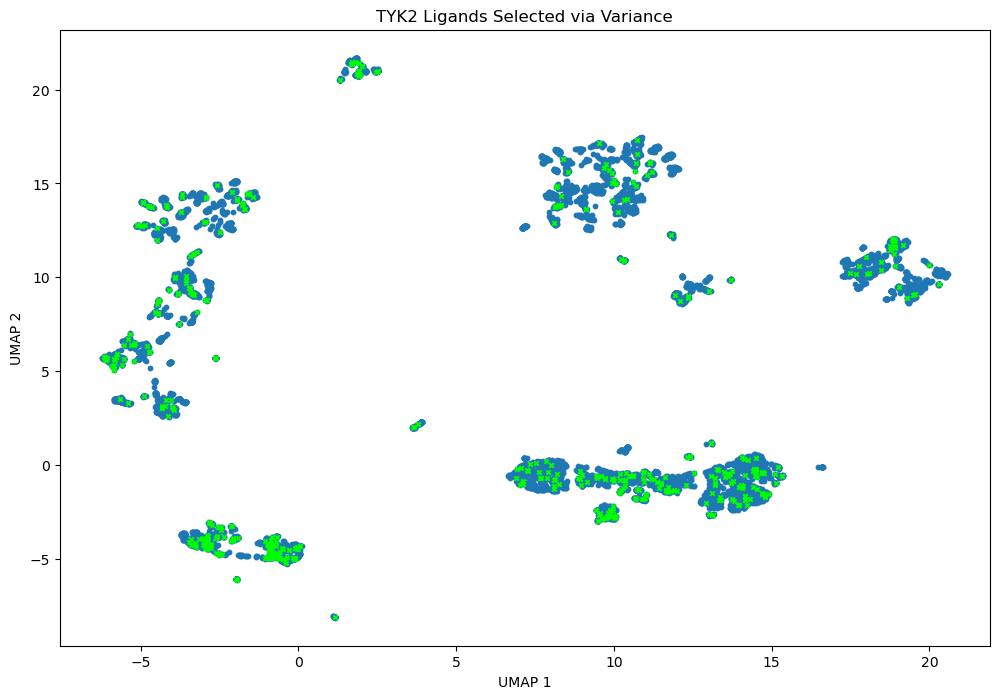

In [241]:

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10)
plt.scatter(data.iloc[umap_inds_var]["umap_1"], data.iloc[umap_inds_var]["umap_2"], color='lime', s=10, marker="x")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via Variance")
plt.show()

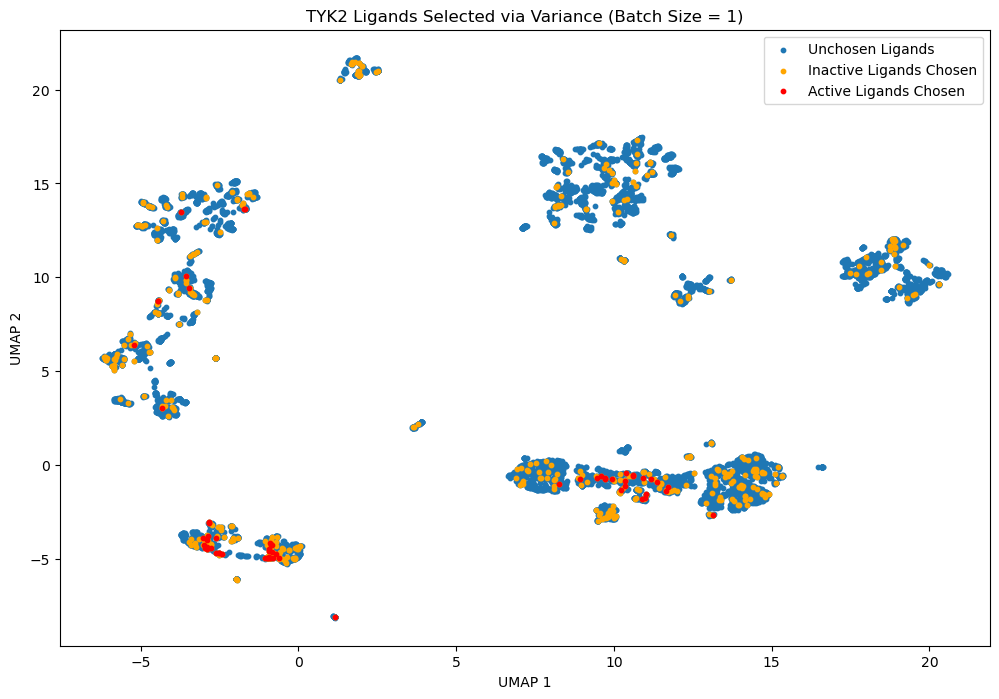

In [242]:
top_5_percent_values = data[data["active"] == 1]
top_5_percent_values_inds = top_5_percent_values.index.tolist()

intersection = list(set(top_5_percent_values_inds).intersection(set(umap_inds_var)))

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Unchosen Ligands")
plt.scatter(data.iloc[umap_inds_var]["umap_1"], data.iloc[umap_inds_var]["umap_2"], color='orange', s=10, label="Inactive Ligands Chosen")
plt.scatter(data.iloc[intersection]["umap_1"], data.iloc[intersection]["umap_2"], color='red', s=10, label="Active Ligands Chosen")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via Variance (Batch Size = 1)")
plt.legend()
plt.show()

In [243]:
print("Proportion of ligands that are labeled active:", len(intersection) / len(umap_inds_var))

Proportion of ligands that are labeled active: 0.122


## Mean

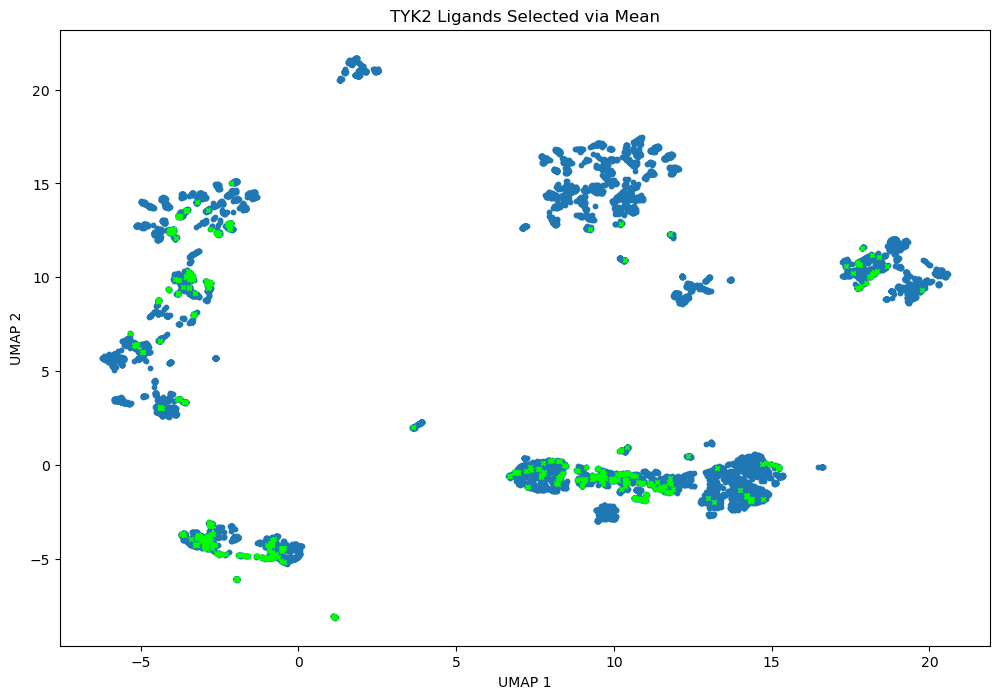

In [244]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10)
plt.scatter(data.iloc[umap_inds_mean]["umap_1"], data.iloc[umap_inds_mean]["umap_2"], color='lime', s=10, marker="x")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via Mean")
plt.show()

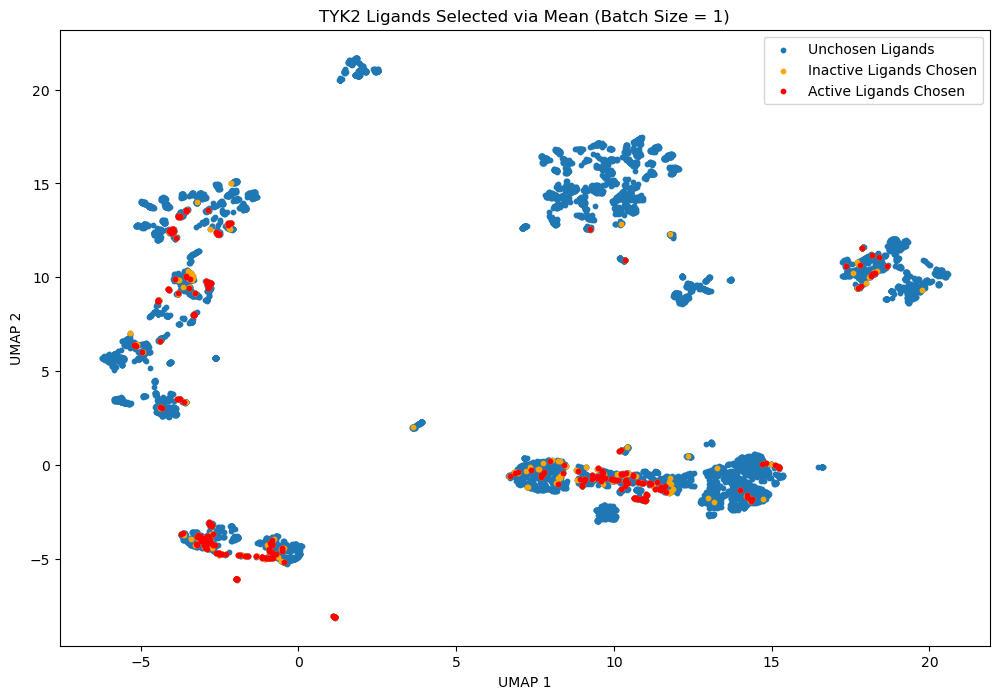

In [245]:
top_5_percent_values = data[data["active"] == 1]
top_5_percent_values_inds = top_5_percent_values.index.tolist()

intersection = list(set(top_5_percent_values_inds).intersection(set(umap_inds_mean)))

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Unchosen Ligands")
plt.scatter(data.iloc[umap_inds_mean]["umap_1"], data.iloc[umap_inds_mean]["umap_2"], color='orange', s=10, label="Inactive Ligands Chosen")
plt.scatter(data.iloc[intersection]["umap_1"], data.iloc[intersection]["umap_2"], color='red', s=10, label="Active Ligands Chosen")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.title("TYK2 Ligands Selected via Mean (Batch Size = 1)")
plt.show()

In [246]:
print("Proportion of ligands that are labeled active:", len(intersection) / len(umap_inds_mean))

Proportion of ligands that are labeled active: 0.618


## Random Selection

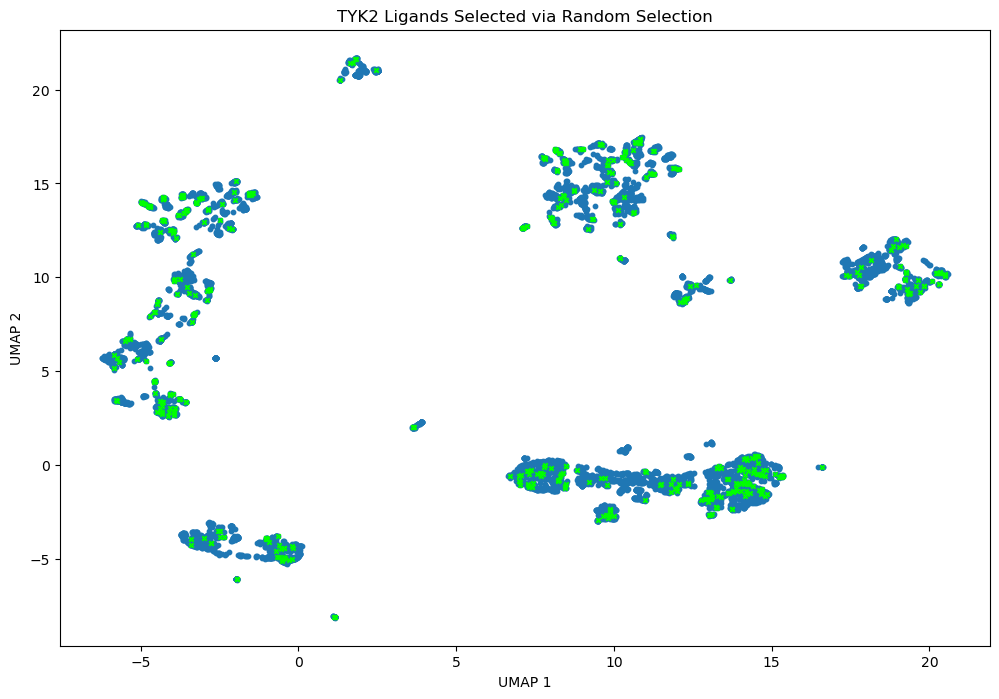

In [247]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10)
plt.scatter(data.iloc[umap_inds_rand]["umap_1"], data.iloc[umap_inds_rand]["umap_2"], color='lime', s=10, marker="x")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via Random Selection")
plt.show()

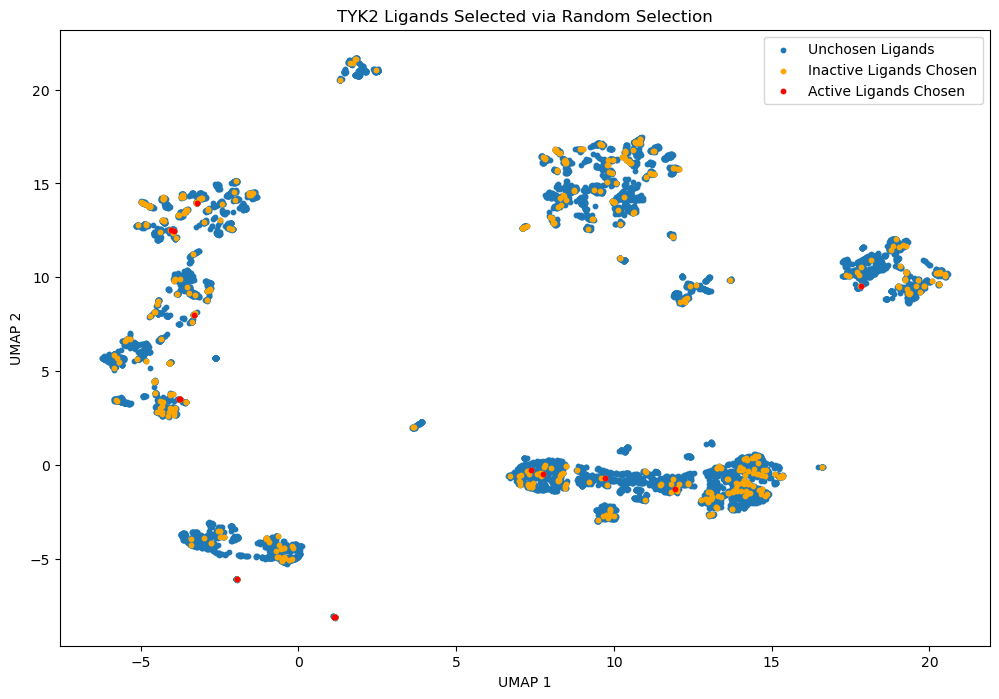

In [248]:
top_5_percent_values = data[data["active"] == 1]
top_5_percent_values_inds = top_5_percent_values.index.tolist()

intersection = list(set(top_5_percent_values_inds).intersection(set(umap_inds_rand)))

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Unchosen Ligands")
plt.scatter(data.iloc[umap_inds_rand]["umap_1"], data.iloc[umap_inds_rand]["umap_2"], color='orange', s=10, label="Inactive Ligands Chosen")
plt.scatter(data.iloc[intersection]["umap_1"], data.iloc[intersection]["umap_2"], color='red', s=10, label="Active Ligands Chosen")
plt.xlabel("UMAP 1")
plt.legend()
plt.ylabel("UMAP 2")
plt.title("TYK2 Ligands Selected via Random Selection")
plt.show()

In [249]:
print("Proportion of ligands that are labeled active:", len(intersection) / len(umap_inds_rand))

Proportion of ligands that are labeled active: 0.028


# Biased UCB

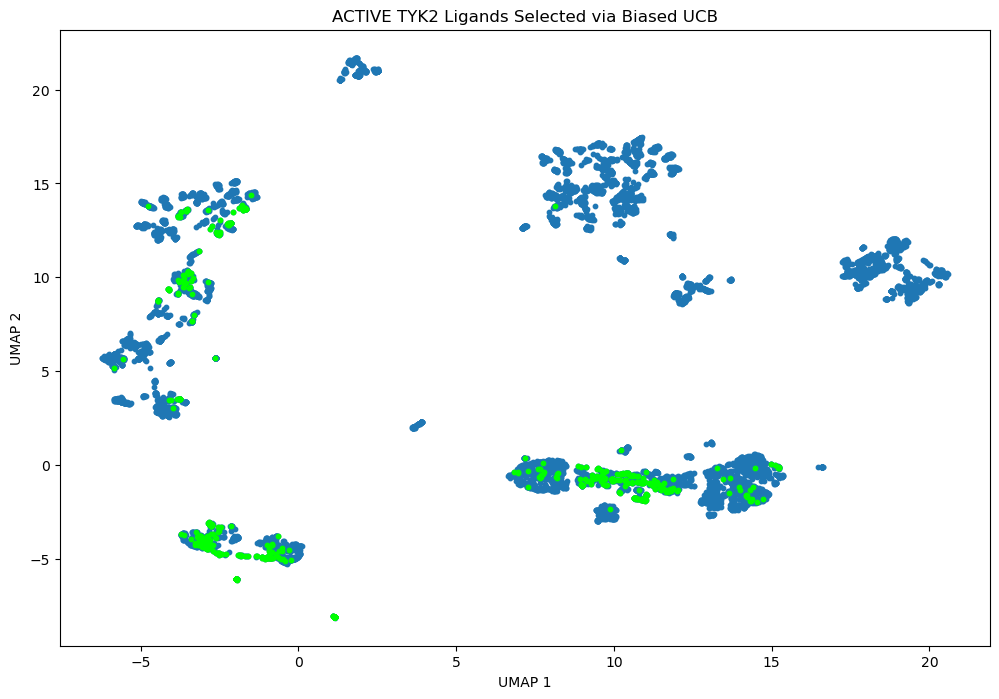

In [250]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10)
plt.scatter(data.iloc[umap_inds_ucb_biased]["umap_1"], data.iloc[umap_inds_ucb_biased]["umap_2"], color='lime', s=10)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("ACTIVE TYK2 Ligands Selected via Biased UCB")
plt.show()

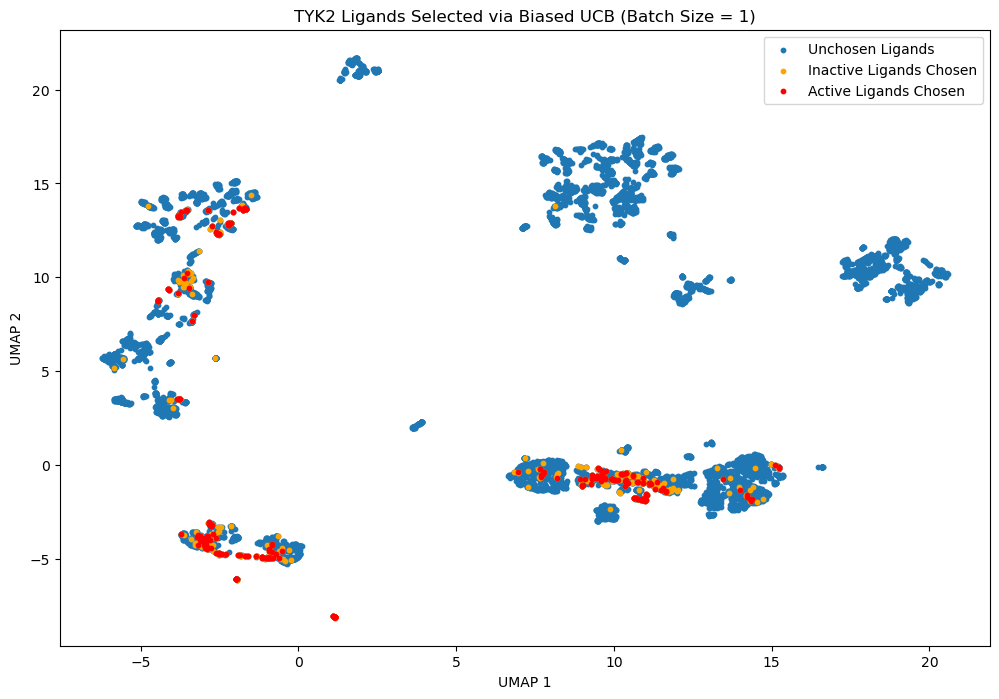

In [266]:
top_5_percent_values = data[data["active"] == 1]
top_5_percent_values_inds = top_5_percent_values.index.tolist()

intersection = list(set(top_5_percent_values_inds).intersection(set(umap_inds_ucb_biased)))

plt.figure(figsize=(12,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1], s=10, label="Unchosen Ligands")
plt.scatter(data.iloc[umap_inds_ucb_biased]["umap_1"], data.iloc[umap_inds_ucb_biased]["umap_2"], color='orange', s=10, label="Inactive Ligands Chosen")
plt.scatter(data.iloc[intersection]["umap_1"], data.iloc[intersection]["umap_2"], color='red', s=10, label="Active Ligands Chosen")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.title("TYK2 Ligands Selected via Biased UCB (Batch Size = 1)")
plt.show()

In [252]:
print("Proportion of ligands that are labeled active:", len(intersection) / len(umap_inds_ucb_biased))

Proportion of ligands that are labeled active: 0.508


# Plotting RMSE For GP Model

Text(0, 0.5, 'RMSE')

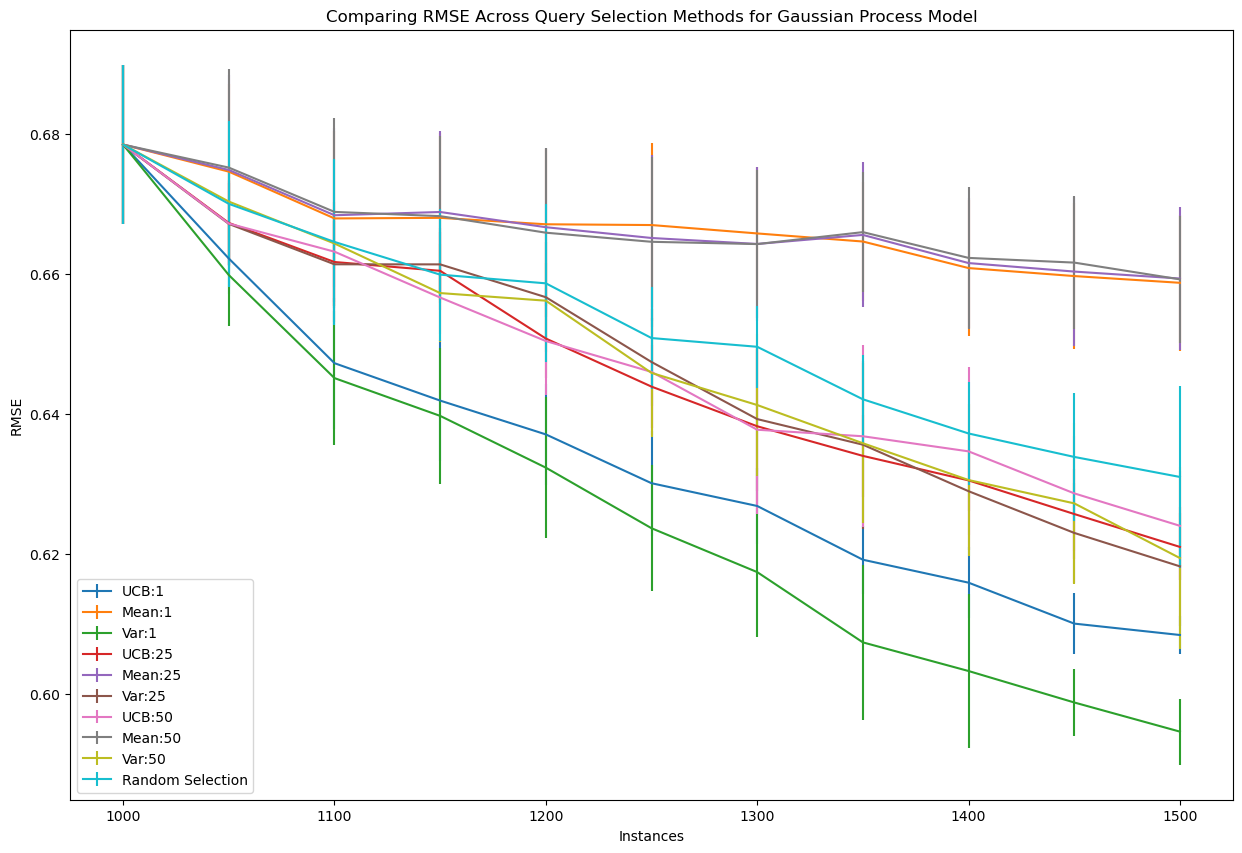

In [253]:
len_data = 0.1*len(data)
plt.figure(figsize=(15,10))

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_rmse_mean"],
             yerr = gp_ucb["1_rmse_stdev"],
             label="UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["1_rmse_mean"],
             yerr = gp_mean["1_rmse_stdev"],
             label="Mean:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["1_rmse_mean"],
             yerr = gp_var["1_rmse_stdev"],
             label = "Var:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_rmse_mean"],
             yerr = gp_ucb["25_rmse_stdev"],
             label="UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["25_rmse_mean"],
             yerr = gp_mean["25_rmse_stdev"],
             label="Mean:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["25_rmse_mean"],
             yerr = gp_var["25_rmse_stdev"],
             label = "Var:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_rmse_mean"],
             yerr = gp_ucb["50_rmse_stdev"],
             label="UCB:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["50_rmse_mean"],
             yerr = gp_mean["50_rmse_stdev"],
             label="Mean:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["50_rmse_mean"],
             yerr = gp_var["50_rmse_stdev"],
             label = "Var:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = rand["1_rmse_mean"],
             yerr = rand["1_rmse_stdev"],
             label = "Random Selection")

plt.title("Comparing RMSE Across Query Selection Methods for Gaussian Process Model")
plt.legend(loc='lower left')
plt.xlabel("Instances")
plt.ylabel("RMSE")

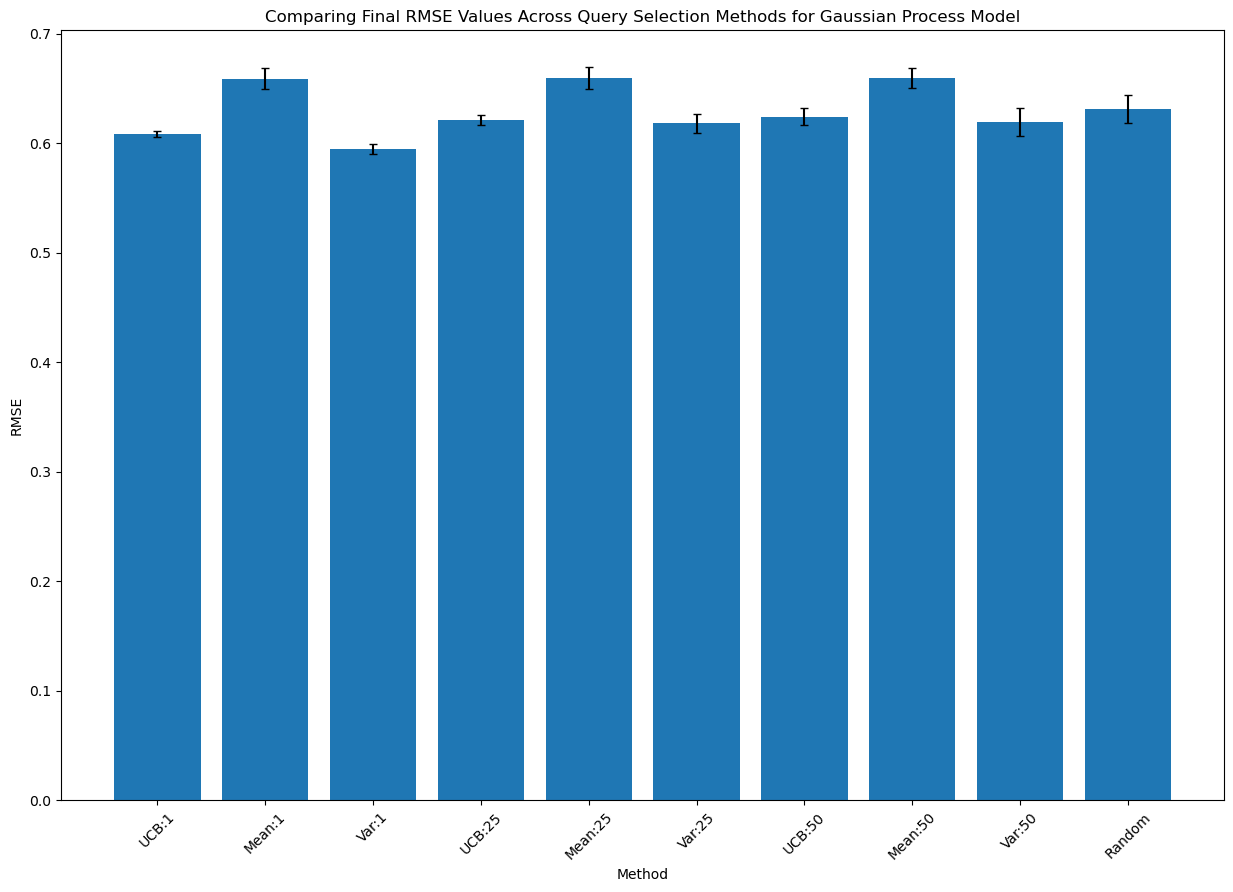

In [254]:
plt.figure(figsize=(15,10))
avgs = [gp_ucb["1_rmse_mean"].iloc[-1], 
        gp_mean["1_rmse_mean"].iloc[-1],
        gp_var["1_rmse_mean"].iloc[-1],
        gp_ucb["25_rmse_mean"].iloc[-1], 
        gp_mean["25_rmse_mean"].iloc[-1],
        gp_var["25_rmse_mean"].iloc[-1],
        gp_ucb["50_rmse_mean"].iloc[-1], 
        gp_mean["50_rmse_mean"].iloc[-1],
        gp_var["50_rmse_mean"].iloc[-1],
        rand["1_rmse_mean"].iloc[-1]]

stds = [gp_ucb["1_rmse_stdev"].iloc[-1], 
        gp_mean["1_rmse_stdev"].iloc[-1],
        gp_var["1_rmse_stdev"].iloc[-1],
        gp_ucb["25_rmse_stdev"].iloc[-1], 
        gp_mean["25_rmse_stdev"].iloc[-1],
        gp_var["25_rmse_stdev"].iloc[-1],
        gp_ucb["50_rmse_stdev"].iloc[-1], 
        gp_mean["50_rmse_stdev"].iloc[-1],
        gp_var["50_rmse_stdev"].iloc[-1],
        rand["1_rmse_stdev"].iloc[-1]]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title('Comparing Final RMSE Values Across Query Selection Methods for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "Mean:1",
                              "Var:1",
                              "UCB:25",
                              "Mean:25",
                              "Var:25",
                              "UCB:50",
                              "Mean:50",
                              "Var:50",
                              "Random"],
                rotation=45)

plt.show()

# Plotting R^2 for GP Model

Text(0, 0.5, '$R^2$')

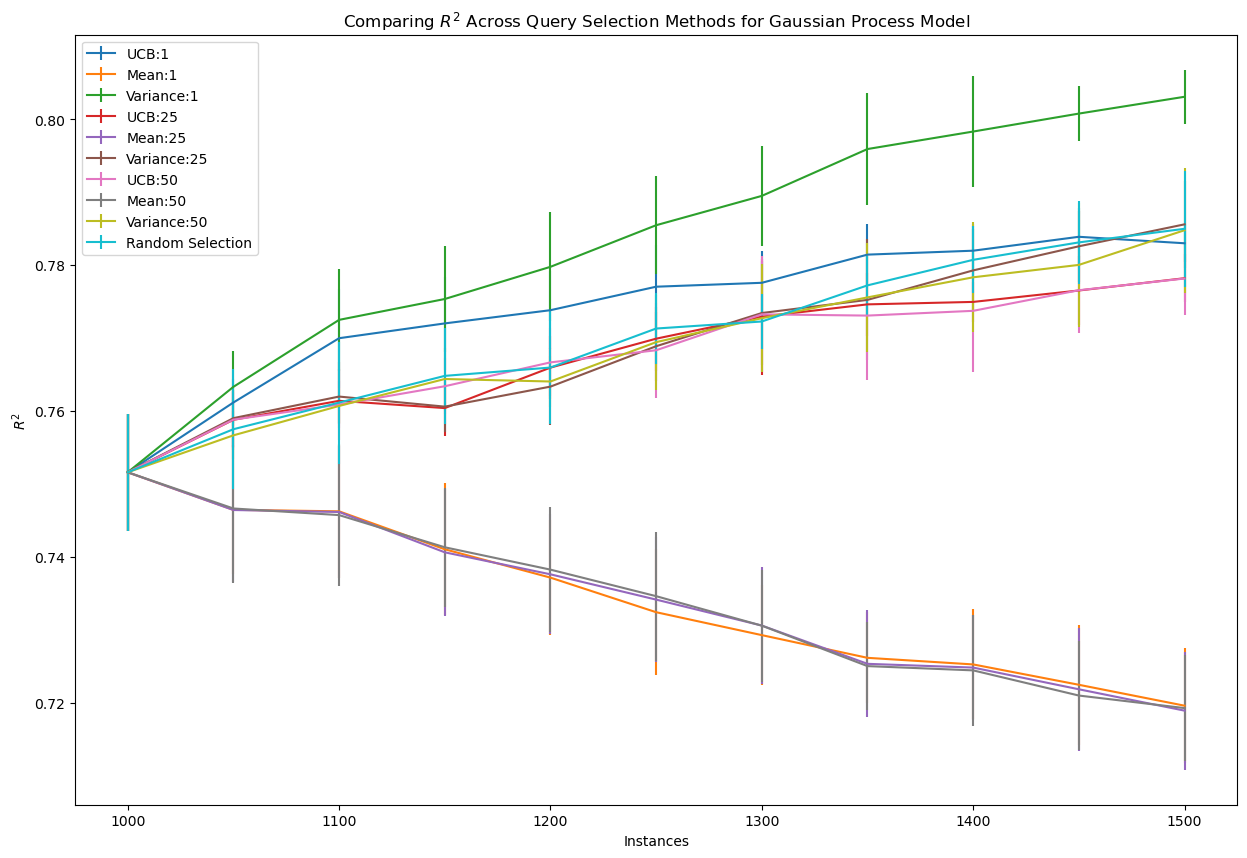

In [255]:
len_data = 0.1*len(data)
plt.figure(figsize=(15,10))

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_r2_mean"],
             yerr = gp_ucb["1_r2_stdev"],
             label="UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["1_r2_mean"],
             yerr = gp_mean["1_r2_stdev"],
             label="Mean:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["1_r2_mean"],
             yerr = gp_var["1_r2_stdev"],
             label = "Variance:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_r2_mean"],
             yerr = gp_ucb["25_r2_stdev"],
             label="UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["25_r2_mean"],
             yerr = gp_mean["25_r2_stdev"],
             label="Mean:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["25_r2_mean"],
             yerr = gp_var["25_r2_stdev"],
             label = "Variance:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_r2_mean"],
             yerr = gp_ucb["50_r2_stdev"],
             label="UCB:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_mean["50_r2_mean"],
             yerr = gp_mean["50_r2_stdev"],
             label="Mean:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_var["50_r2_mean"],
             yerr = gp_var["50_r2_stdev"],
             label = "Variance:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = rand["1_r2_mean"],
             yerr = rand["1_r2_stdev"],
             label = "Random Selection")

plt.title(r'Comparing $R^2$ Across Query Selection Methods for Gaussian Process Model')
plt.legend()
plt.xlabel("Instances")
plt.ylabel(r'$R^2$')

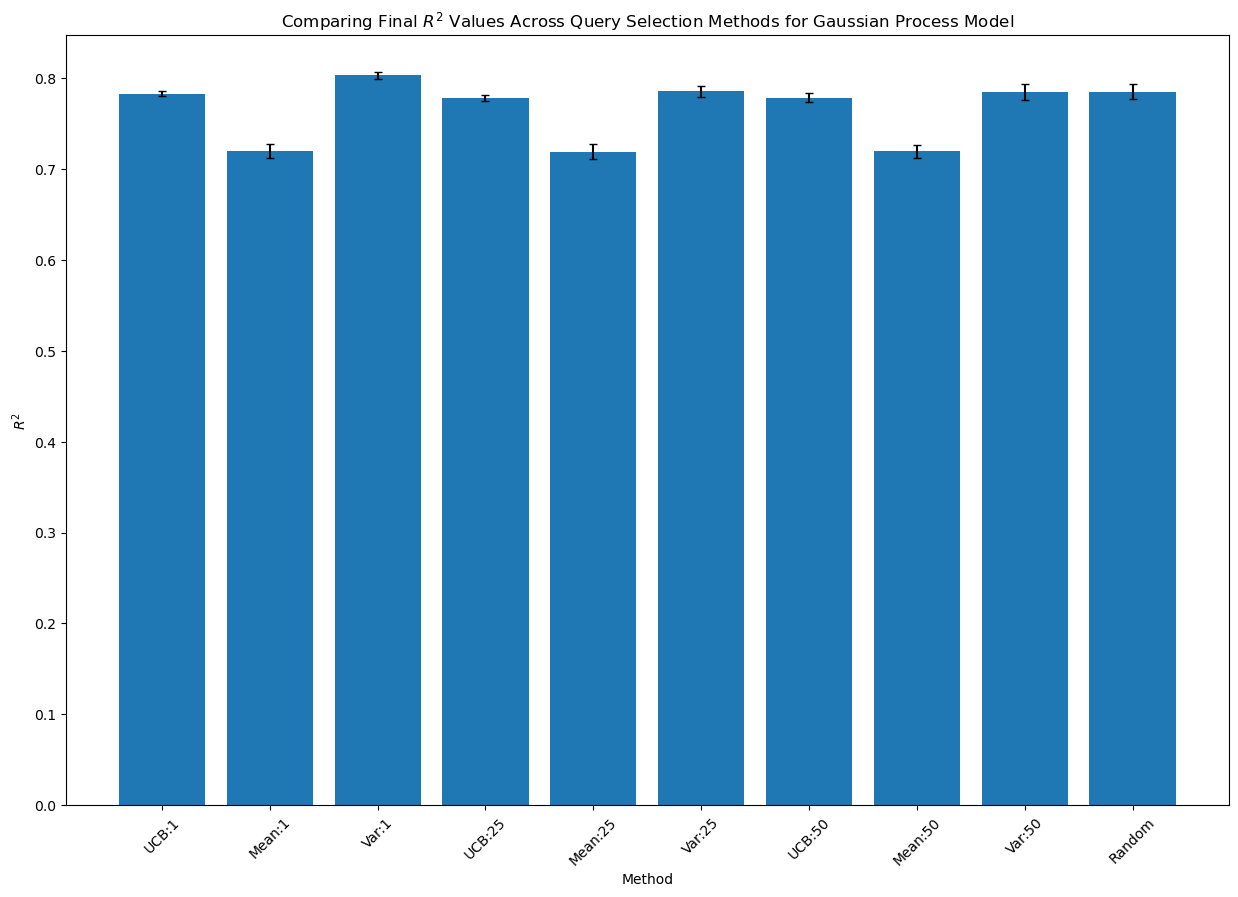

In [256]:
plt.figure(figsize=(15,10))

avgs = [gp_ucb["1_r2_mean"].iloc[-1], 
        gp_mean["1_r2_mean"].iloc[-1],
        gp_var["1_r2_mean"].iloc[-1],
        gp_ucb["25_r2_mean"].iloc[-1], 
        gp_mean["25_r2_mean"].iloc[-1],
        gp_var["25_r2_mean"].iloc[-1],
        gp_ucb["50_r2_mean"].iloc[-1], 
        gp_mean["50_r2_mean"].iloc[-1],
        gp_var["50_r2_mean"].iloc[-1],
        rand["1_r2_mean"].iloc[-1]]

stds = [gp_ucb["1_r2_stdev"].iloc[-1], 
        gp_mean["1_r2_stdev"].iloc[-1],
        gp_var["1_r2_stdev"].iloc[-1],
        gp_ucb["25_r2_stdev"].iloc[-1], 
        gp_mean["25_r2_stdev"].iloc[-1],
        gp_var["25_r2_stdev"].iloc[-1],
        gp_ucb["50_r2_stdev"].iloc[-1], 
        gp_mean["50_r2_stdev"].iloc[-1],
        gp_var["50_r2_stdev"].iloc[-1],
        rand["1_r2_stdev"].iloc[-1]]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel(r'$R^2$')
plt.title(r'Comparing Final $R^2$ Values Across Query Selection Methods for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "Mean:1",
                              "Var:1",
                              "UCB:25",
                              "Mean:25",
                              "Var:25",
                              "UCB:50",
                              "Mean:50",
                              "Var:50",
                              "Random"],
                rotation=45)

plt.show()

# Biased vs. Unbiased UCB Plots

Text(0, 0.5, 'RMSE')

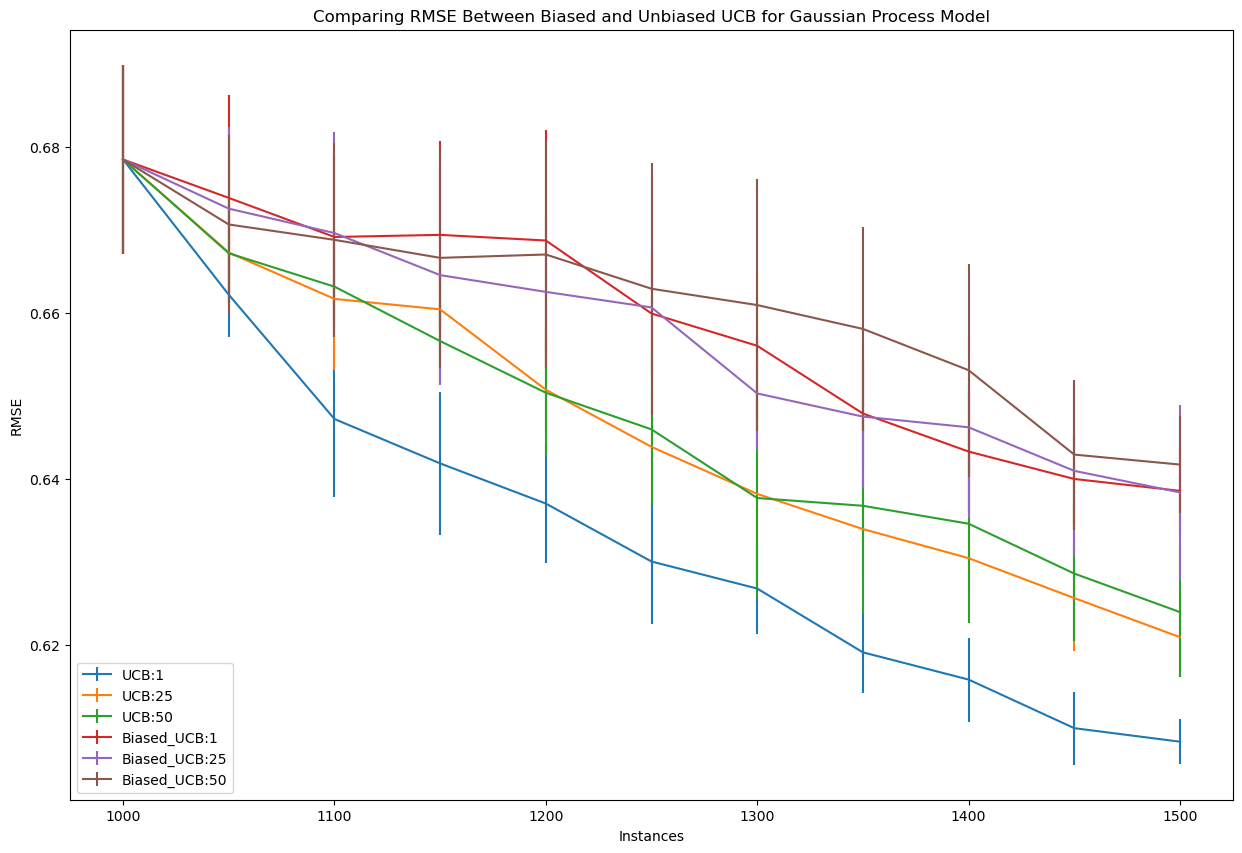

In [257]:
len_data = 0.1*len(data)
plt.figure(figsize=(15,10))

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_rmse_mean"],
             yerr = gp_ucb["1_rmse_stdev"],
             label="UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_rmse_mean"],
             yerr = gp_ucb["25_rmse_stdev"],
             label="UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_rmse_mean"],
             yerr = gp_ucb["50_rmse_stdev"],
             label="UCB:50")

plt.errorbar(x = range(1000,1550, 50),
             y = gp_ucb_biased["1_rmse_mean"],
             yerr = gp_ucb_biased["1_rmse_stdev"],
             label = "Biased_UCB:1")

plt.errorbar(x = range(1000,1550, 50),
             y = gp_ucb_biased["25_rmse_mean"],
             yerr = gp_ucb_biased["25_rmse_stdev"],
             label = "Biased_UCB:25")

plt.errorbar(x = range(1000,1550, 50),
             y = gp_ucb_biased["50_rmse_mean"],
             yerr = gp_ucb_biased["50_rmse_stdev"],
             label = "Biased_UCB:50")

plt.title("Comparing RMSE Between Biased and Unbiased UCB for Gaussian Process Model")
plt.legend(loc='lower left')
plt.xlabel("Instances")
plt.ylabel("RMSE")

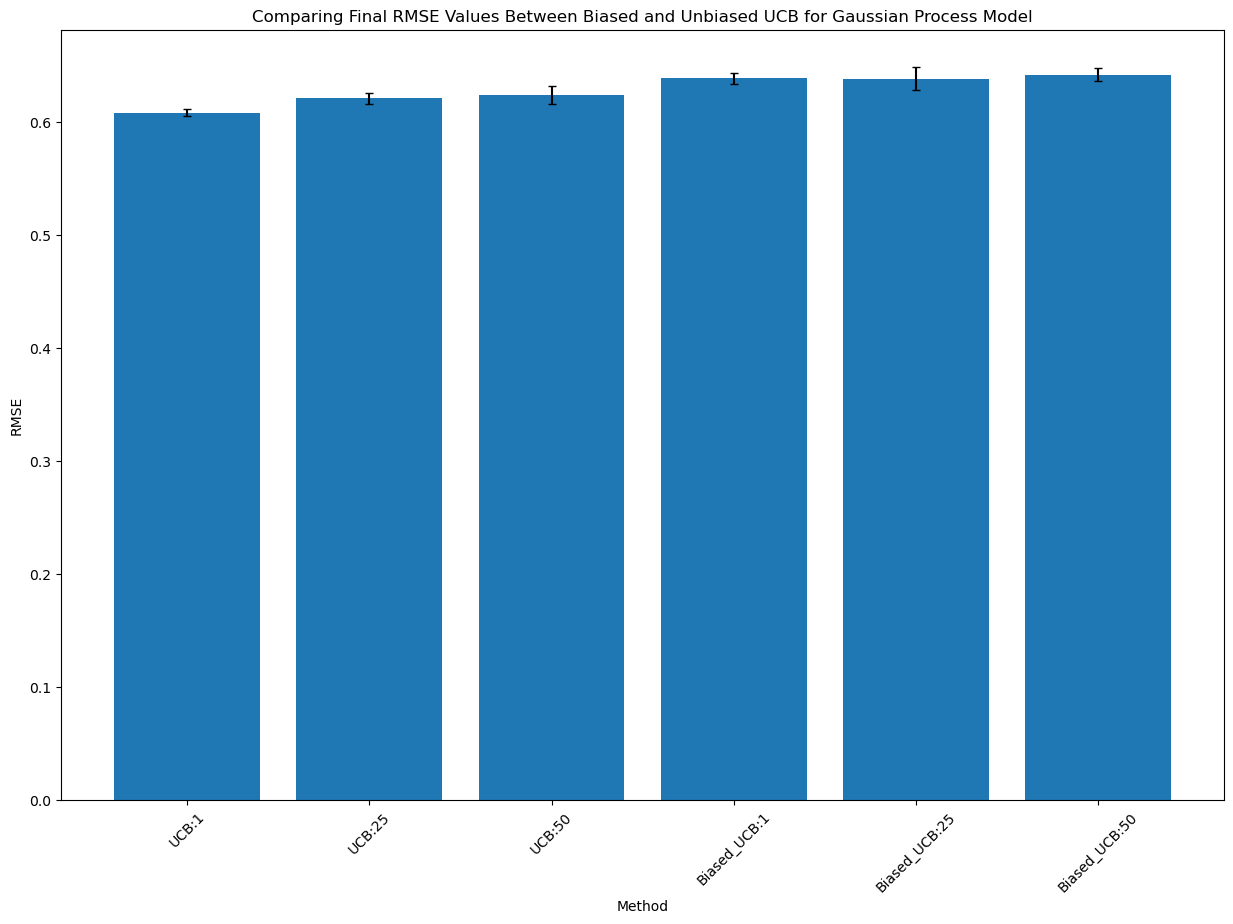

In [260]:
plt.figure(figsize=(15,10))
avgs = [gp_ucb["1_rmse_mean"].iloc[-1], 
        gp_ucb["25_rmse_mean"].iloc[-1], 
        gp_ucb["50_rmse_mean"].iloc[-1],
        gp_ucb_biased["1_rmse_mean"].iloc[-1], 
        gp_ucb_biased["25_rmse_mean"].iloc[-1], 
        gp_ucb_biased["50_rmse_mean"].iloc[-1]
        ]

stds = [gp_ucb["1_rmse_stdev"].iloc[-1], 
        gp_ucb["25_rmse_stdev"].iloc[-1], 
        gp_ucb["50_rmse_stdev"].iloc[-1], 
        gp_ucb_biased["1_rmse_stdev"].iloc[-1], 
        gp_ucb_biased["25_rmse_stdev"].iloc[-1], 
        gp_ucb_biased["50_rmse_stdev"].iloc[-1]
        ]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title('Comparing Final RMSE Values Between Biased and Unbiased UCB for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "UCB:25",
                              "UCB:50",
                              "Biased_UCB:1",
                              "Biased_UCB:25",
                              "Biased_UCB:50"],
                rotation=45)

plt.show()

Text(0, 0.5, '$R^2$')

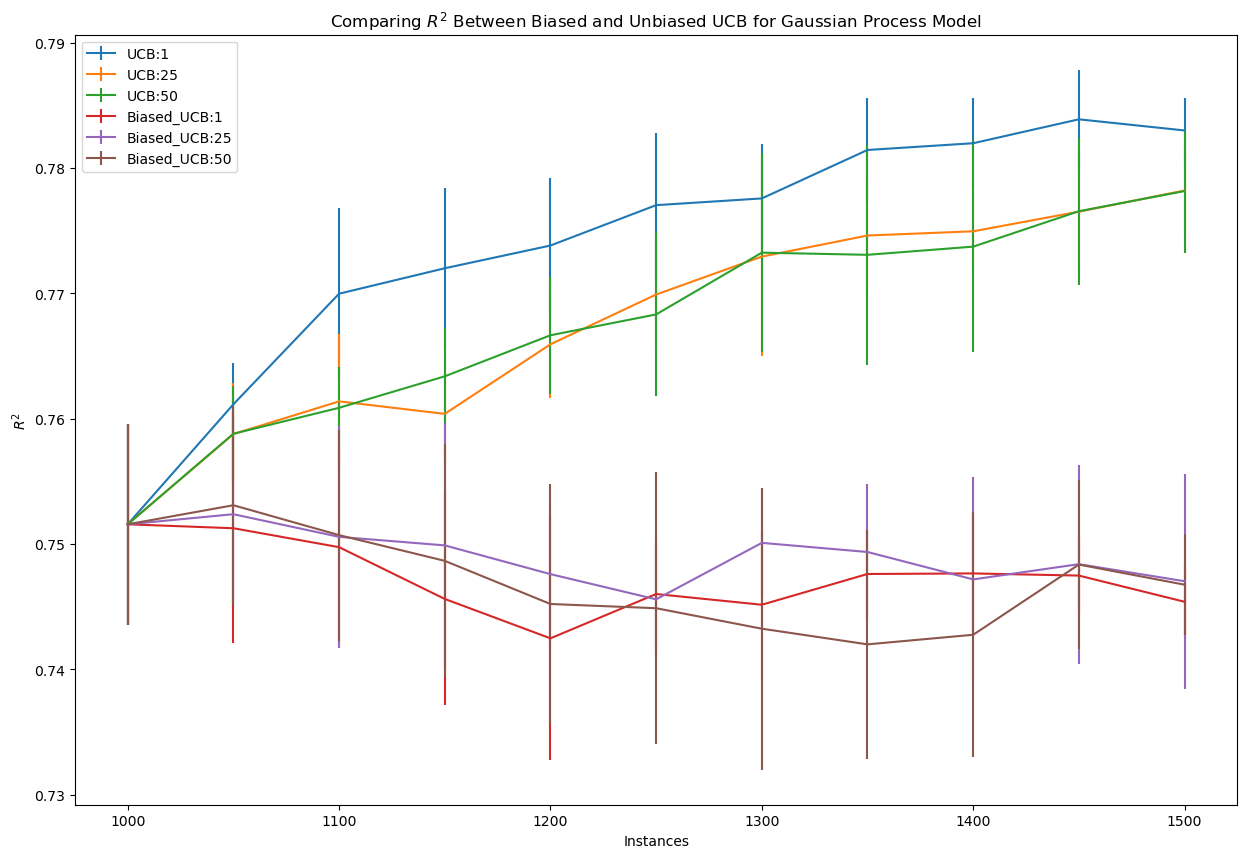

In [259]:
len_data = 0.1*len(data)
plt.figure(figsize=(15,10))

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["1_r2_mean"],
             yerr = gp_ucb["1_r2_stdev"],
             label="UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["25_r2_mean"],
             yerr = gp_ucb["25_r2_stdev"],
             label="UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb["50_r2_mean"],
             yerr = gp_ucb["50_r2_stdev"],
             label="UCB:50")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb_biased["1_r2_mean"],
             yerr = gp_ucb_biased["1_r2_stdev"],
             label="Biased_UCB:1")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb_biased["25_r2_mean"],
             yerr = gp_ucb_biased["25_r2_stdev"],
             label="Biased_UCB:25")

plt.errorbar(x = range(1000, 1550, 50),
             y = gp_ucb_biased["50_r2_mean"],
             yerr = gp_ucb_biased["50_r2_stdev"],
             label="Biased_UCB:50")



plt.title(r'Comparing $R^2$ Between Biased and Unbiased UCB for Gaussian Process Model')
plt.legend()
plt.xlabel("Instances")
plt.ylabel(r'$R^2$')

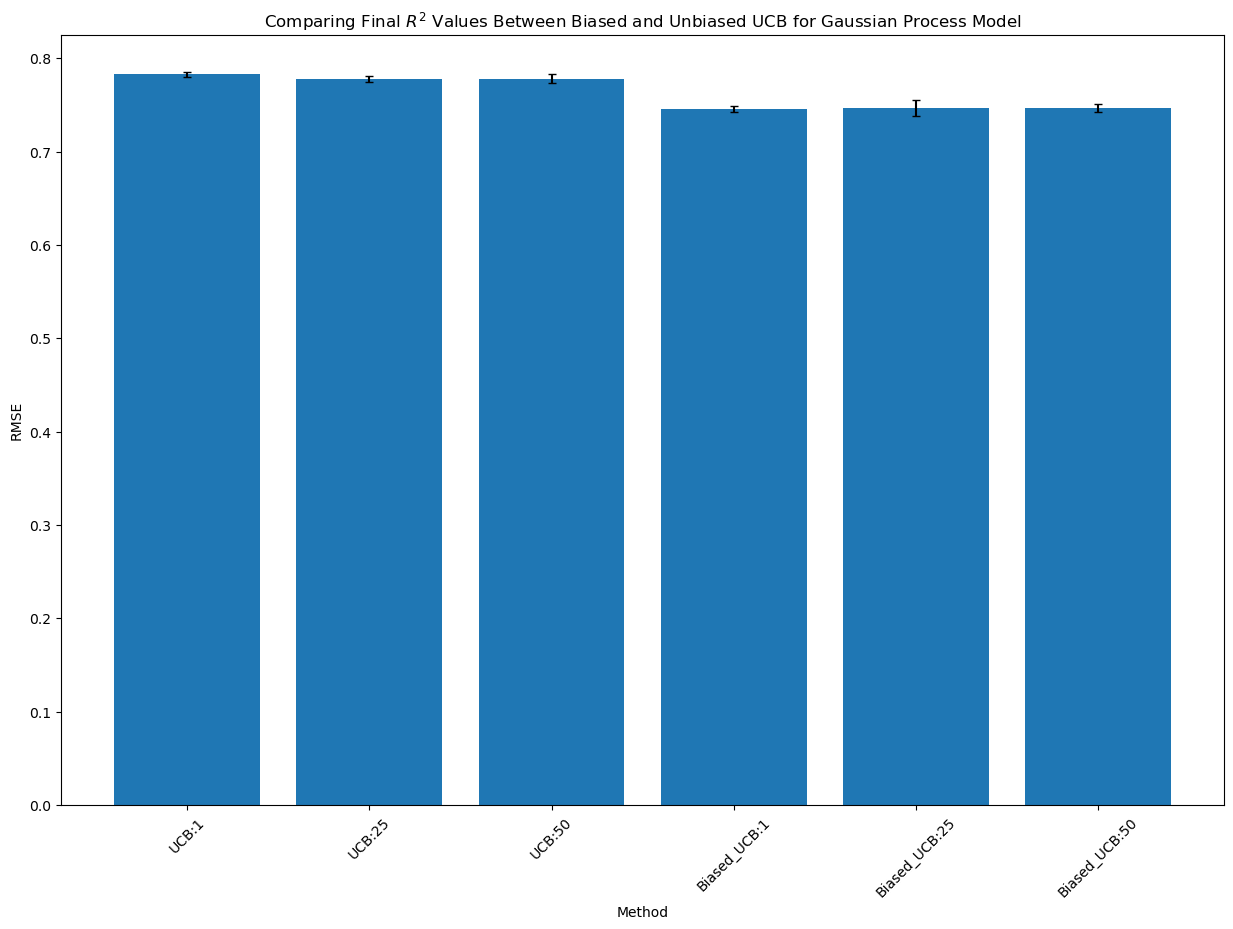

In [261]:
plt.figure(figsize=(15,10))
avgs = [gp_ucb["1_r2_mean"].iloc[-1], 
        gp_ucb["25_r2_mean"].iloc[-1], 
        gp_ucb["50_r2_mean"].iloc[-1],
        gp_ucb_biased["1_r2_mean"].iloc[-1], 
        gp_ucb_biased["25_r2_mean"].iloc[-1], 
        gp_ucb_biased["50_r2_mean"].iloc[-1]
        ]

stds = [gp_ucb["1_r2_stdev"].iloc[-1], 
        gp_ucb["25_r2_stdev"].iloc[-1], 
        gp_ucb["50_r2_stdev"].iloc[-1], 
        gp_ucb_biased["1_r2_stdev"].iloc[-1], 
        gp_ucb_biased["25_r2_stdev"].iloc[-1], 
        gp_ucb_biased["50_r2_stdev"].iloc[-1]
        ]

plt.bar(range(len(avgs)), avgs, yerr = stds, capsize=3)
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.title(r'Comparing Final $R^2$ Values Between Biased and Unbiased UCB for Gaussian Process Model')
plt.xticks(range(len(avgs)), ["UCB:1",
                              "UCB:25",
                              "UCB:50",
                              "Biased_UCB:1",
                              "Biased_UCB:25",
                              "Biased_UCB:50"],
                rotation=45)

plt.show()